## Import necessary packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Loading the dataset

In [2]:
data = pd.read_csv('Position_Salaries.csv')
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


- Here, it can be seen that there are 3 columns in the dataset. The `problem statement` here is to predict the `salary` based on the Position and Level of the employee.

- But we may observe that the Position and the level are related or level is one other way of conveying the position of the employee in the company. So, essentially Position and Level are conveying the same kind of information. As Level is a numeric column, let's use that in our Machine Learning Model.

- Hence, `Level` is our `feature` or `X variable`. 
And, `Salary` is `Label` or the Y `variable`.

In [5]:
x = data.iloc[:,1: 2].values
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [6]:
y = data.iloc[:,2].values
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

Generally, we divide our dataset into two parts

1. The training dataset to train our model. And, 
2. The test dataset to test our prepared model. 

Here, as the dataset has a limited number of entries, we won't do a split. Instead of that, we'd use direct numerical values to test the model.

## Performing Linear Regression

In [7]:
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x, y)

LinearRegression()

## Visualizing the Linear Regression

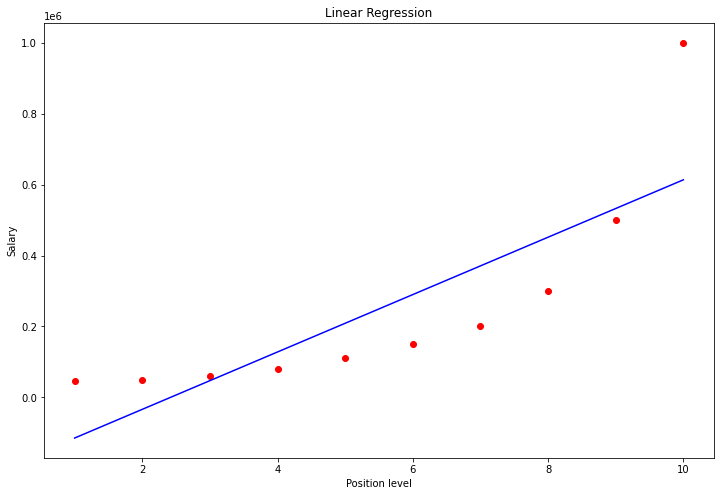

In [9]:
plt.figure(figsize = (12, 8))
plt.scatter(x, y, color = 'red')
plt.plot(x, lin_reg.predict(x), color = 'b')
plt.title('Linear Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

- Here, the red dots are the actual data points and, the blue straight line is what our model has created. It is evident from the diagram above that a Linear model does not fit our dataset well. So, let's try with a Polynomial Model.

## Fitting Polynomial Regression to the dataset

In [12]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)  
# trying to create a 2 degree polynomial equation. It simply squares the x as shown in the output
X_poly = poly_reg.fit_transform(x)
print(X_poly)
poly_reg.fit(X_poly, y)

[[  1.   1.   1.]
 [  1.   2.   4.]
 [  1.   3.   9.]
 [  1.   4.  16.]
 [  1.   5.  25.]
 [  1.   6.  36.]
 [  1.   7.  49.]
 [  1.   8.  64.]
 [  1.   9.  81.]
 [  1.  10. 100.]]


PolynomialFeatures()

In [13]:
# doing the actual polynomial Regression
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression()

## Visualizing the Polynomial Regression results

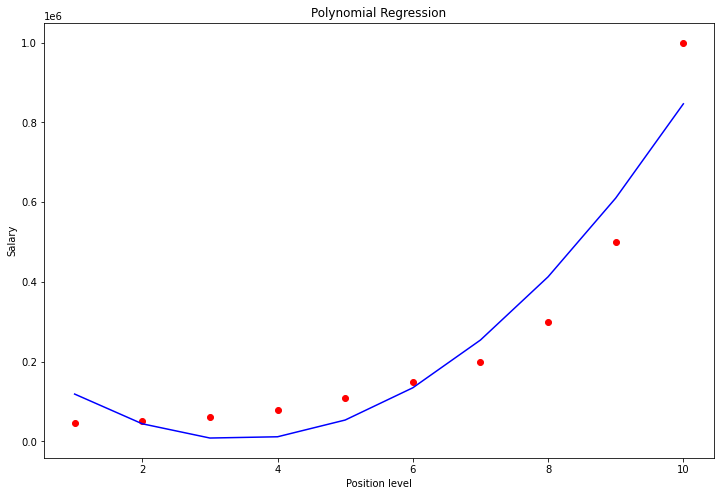

In [15]:
plt.figure(figsize = (12, 8))
plt.scatter(x, y, color = 'red')
plt.plot(x, lin_reg_2.predict(poly_reg.fit_transform(x)), color = 'blue')
plt.title('Polynomial Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

Still, a two degree equation is also not a good fit. Now, we'll try to increase the degree of the equation i.e. we'll try to see that whether we get a good fit at a higher degree or not. After some hit and trial, we see that the model get's the best fit for a 4th degree polynomial equation.

In [16]:
# Fitting Polynomial Regression to the dataset
poly_reg1 = PolynomialFeatures(degree = 4)
X_poly1 = poly_reg1.fit_transform(x)
poly_reg1.fit(X_poly, y)
lin_reg_3 = LinearRegression()
lin_reg_3.fit(X_poly1, y)

LinearRegression()

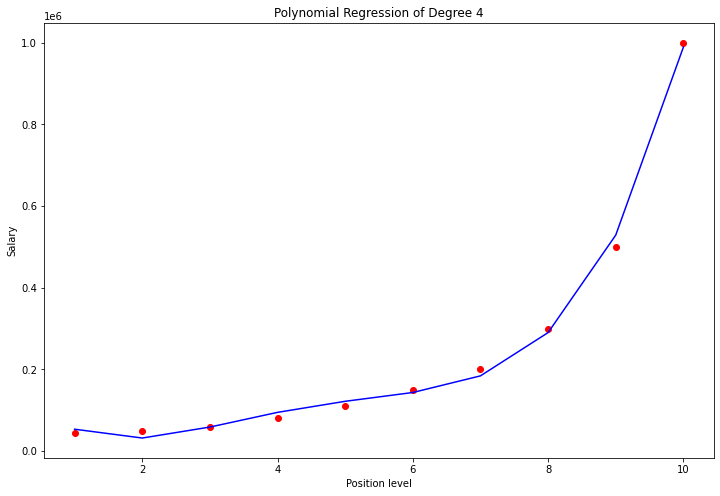

In [17]:
# Visualising the Polynomial Regression results
plt.figure(figsize = (12, 8))
plt.scatter(x, y, color = 'red')
plt.plot(x, lin_reg_3.predict(poly_reg1.fit_transform(x)), color = 'blue')
plt.title('Polynomial Regression of Degree 4')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

Here, we can see that our model now accurately fits the dataset. This kind of a fit might not be the case with the actual business datasets. we are getting a brilliant fit as the number of data points are a few.